In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from matplotlib import pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from models import SciNet
from utils import target_loss 
device = torch.device("cuda:0")

In [2]:
# Setup scinet model with 3 latent neurons
scinet = SciNet(50,1,3,64)

# Load and prepare training data
inputs = torch.Tensor(np.load("training_data/inputs.npy"))
outputs = torch.Tensor(np.load("training_data/outputs.npy"))
traindata = TensorDataset(inputs, outputs)
dataloader = DataLoader(traindata, batch_size=256,shuffle=True, num_workers=1)
     

In [3]:
# Training setup
SAVE_PATH = "trained_models/scinet1.dat"
N_EPOCHS = 100
optimizer = optim.Adam(scinet.parameters())
hist_error = []
hist_loss = []
beta = 0.5

# Training loop
for epoch in range(N_EPOCHS):  
    epoch_error = []
    epoch_loss = []
    for i_batch, minibatch in enumerate(dataloader):

        inputs, outputs = minibatch
        optimizer.zero_grad()
        pred = scinet.forward(inputs)
        
        loss = target_loss(pred, outputs) + beta * scinet.kl_loss
        loss.backward()
        optimizer.step()
        error = torch.mean(torch.sqrt((pred[:,0]-outputs)**2)).detach().numpy()
        epoch_error.append(error)
        epoch_loss.append(loss.data.detach().numpy())
    hist_error.append(np.mean(epoch_error))
    hist_loss.append(np.mean(epoch_loss))
    print("Epoch %d -- loss %f, RMS error %f " % (epoch+1, hist_loss[-1], hist_error[-1]))
    
torch.save(scinet.state_dict(), SAVE_PATH)
print("Model saved to %s" % SAVE_PATH)

Epoch 1 -- loss 16.593849, RMS error 0.170585 
Epoch 2 -- loss 7.636801, RMS error 0.126207 
Epoch 3 -- loss 3.514126, RMS error 0.089356 
Epoch 4 -- loss 2.309311, RMS error 0.074846 
Epoch 5 -- loss 2.016938, RMS error 0.070563 
Epoch 6 -- loss 1.833562, RMS error 0.067729 
Epoch 7 -- loss 1.579440, RMS error 0.063346 
Epoch 8 -- loss 1.369459, RMS error 0.059893 
Epoch 9 -- loss 1.219574, RMS error 0.057151 
Epoch 10 -- loss 1.110448, RMS error 0.054878 
Epoch 11 -- loss 1.035475, RMS error 0.053298 
Epoch 12 -- loss 0.981782, RMS error 0.052065 
Epoch 13 -- loss 0.923182, RMS error 0.050650 
Epoch 14 -- loss 0.887896, RMS error 0.049872 
Epoch 15 -- loss 0.822554, RMS error 0.048091 
Epoch 16 -- loss 0.772634, RMS error 0.046866 
Epoch 17 -- loss 0.727436, RMS error 0.045767 
Epoch 18 -- loss 0.701246, RMS error 0.045131 
Epoch 19 -- loss 0.680254, RMS error 0.044629 
Epoch 20 -- loss 0.651239, RMS error 0.043706 
Epoch 21 -- loss 0.636901, RMS error 0.043414 
Epoch 22 -- loss 0.62

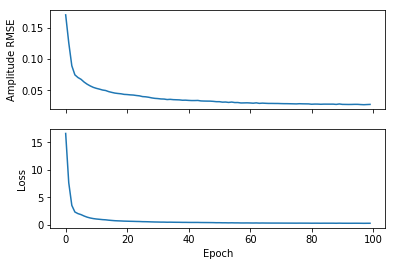

In [4]:
# Plot some training history data
%matplotlib inline 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(hist_error)
ax1.set_ylabel("Amplitude RMSE")
ax2.plot(hist_loss)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
plt.show()